In [0]:
import requests, json, time, urllib3, io
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
def load(url, printout=False, remove_bottom_rows=0, remove_columns =[]):
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
  response = requests.get(url, headers = headers)
  df = pd.read_json(response.text)
  
  if remove_bottom_rows > 0:
    df.drop(df.tail(remove_bottom_rows).index, inplace=True)
    
  df.drop(columns=remove_columns, axis=1, inplace=True)
  
  df = df.dropna(axis=1)
  
  if printout:
    print(df.head())
    print(df.shape)
    
  return df

  

In [0]:
def get_trades_for_product(product_id):
  type = '/trades'
  url = "https://api.gdax.com/products/" + product_id + type
  return load(url)

     price  side       size                      time  trade_id
0   566.78  sell   6.706500  2018-05-29T19:08:05.985Z  35112532
1   566.78  sell   8.746300  2018-05-29T19:07:51.759Z  35112531
2   566.78  sell   1.074900  2018-05-29T19:07:40.212Z  35112530
3   566.78  sell   8.082421  2018-05-29T19:07:28.984Z  35112529
4   566.78  sell   0.016758  2018-05-29T19:07:28.984Z  35112528
5   566.78  sell   0.025582  2018-05-29T19:07:28.984Z  35112527
6   566.78  sell   1.749939  2018-05-29T19:07:28.984Z  35112526
7   566.78  sell  11.055171  2018-05-29T19:07:26.681Z  35112525
8   566.78  sell   0.631300  2018-05-29T19:07:17.438Z  35112524
9   566.77   buy   0.141337  2018-05-29T19:07:04.654Z  35112523
10  566.78  sell   6.563589  2018-05-29T19:06:52.901Z  35112522
11  566.72  sell   0.030000  2018-05-29T19:06:52.901Z  35112521
12  566.71  sell   0.011464  2018-05-29T19:06:52.901Z  35112520
13  566.67  sell   0.010960  2018-05-29T19:06:52.901Z  35112519
14  566.67  sell   5.481487  2018-05-29T

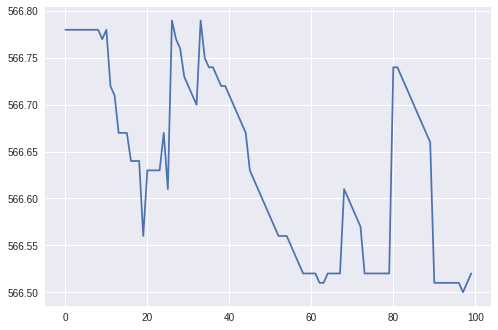

In [23]:
data = get_trades_for_product('eth-usd')
print(data)
# data = data['price']

# df['time'] = pd.to_datetime(df['time'][:-1], format='%m/%d/%YT%H:%M:%SZ')


import matplotlib.pyplot as plt
plt.plot( data['price'])
plt.show()